In [104]:
import pandas as pd
import pymysql
import sqlalchemy
import re
import matplotlib.pyplot as plt

In [4]:
sharknado = pd.read_csv('/Users/joel/datamex_082020/module-1/pandas-project/your-code/attacks.csv', engine = 'python', sep=',')

In [5]:
sharknado

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sharknado.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [75]:
data = pd.DataFrame(sharknado)
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25Jun2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,no existing data,no existing data
1,2018.06.18,18Jun2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,no existing data,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,no existing data,no existing data
2,2018.06.09,09Jun2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,no existing data,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,no existing data,no existing data
3,2018.06.08,08Jun2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,mle,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,no existing data,no existing data
4,2018.06.04,04Jun2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustvo Rmos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,no existing data,no existing data


In [7]:
pd.isnull(sharknado).sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [8]:
sharknado['Case Number']

0        2018.06.25
1        2018.06.18
2        2018.06.09
3        2018.06.08
4        2018.06.04
            ...    
25718           NaN
25719           NaN
25720           NaN
25721           NaN
25722            xx
Name: Case Number, Length: 25723, dtype: object

In [9]:
sharknado.fillna('no existing data', inplace = True)

In [10]:
sharknado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             25723 non-null  object
 1   Date                    25723 non-null  object
 2   Year                    25723 non-null  object
 3   Type                    25723 non-null  object
 4   Country                 25723 non-null  object
 5   Area                    25723 non-null  object
 6   Location                25723 non-null  object
 7   Activity                25723 non-null  object
 8   Name                    25723 non-null  object
 9   Sex                     25723 non-null  object
 10  Age                     25723 non-null  object
 11  Injury                  25723 non-null  object
 12  Fatal (Y/N)             25723 non-null  object
 13  Time                    25723 non-null  object
 14  Species                 25723 non-null  object
 15  In

In [11]:
type(sharknado)

pandas.core.frame.DataFrame

In [12]:
sharknado.shape

(25723, 24)

In [13]:
sharknado.loc[666]

Case Number                                                      2013.06.16
Date                                                            16-Jun-2013
Year                                                                   2013
Type                                                             Unprovoked
Country                                                        SOUTH AFRICA
Area                                                  Eastern Cape Province
Location                                                    Queensberry Bay
Activity                                                            Surfing
Name                                                           Kevin Bracey
Sex                                                                       M
Age                                                        no existing data
Injury                                                  Lacerations to knee
Fatal (Y/N)                                                               N
Time        

In [14]:
sharknado.columns[22:23]

Index(['Unnamed: 22'], dtype='object')

In [15]:
sharknado['Unnamed: 22'].value_counts()

no existing data    25722
stopped here            1
Name: Unnamed: 22, dtype: int64

In [16]:
sharknado['Unnamed: 23'].value_counts()

no existing data    25721
Teramo                  1
change filename         1
Name: Unnamed: 23, dtype: int64

In [17]:
sharknado['Case Number.1'].equals(sharknado['Case Number.2'].equals(sharknado['Case Number']))
print('they`re not the same')

they`re not the same


In [18]:
sharknado['Case Number.1'].equals(sharknado['Case Number.2'])
print('they`re not the same')

they`re not the same


In [19]:
sharknado['Case Number.2'].equals(sharknado['Case Number'])
print('they`re not the same')

they`re not the same


In [20]:
if 'Case Number.1' == 'Case Numeber.2':
    print('True for 1 an 2')
elif 'Case Number.1' == 'Case Number':
    print ('True for 1 and primary')
elif 'Case Number' == 'Case Number.2':
    print('True for primary and 2')
else:
    print(False)

False


In [21]:
sharknado['Case Number.1'].isin(sharknado['Case Number.2']).value_counts()

True     25704
False       19
Name: Case Number.1, dtype: int64

In [22]:
sharknado['Case Number.2'].isin(sharknado['Case Number']).value_counts()

True     25719
False        4
Name: Case Number.2, dtype: int64

In [32]:
sharknado.loc[sharknado['Case Number']!=(sharknado['Case Number.1'])]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
34,2018.04.03,03-Apr-2018,2018,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,...,White shark,"K. McMurray, TrackingSharks.com",2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.02,2018.04.03,6269,no existing data,no existing data
117,2017.07.20.a,20-Jul-2017,2017,Unprovoked,USA,California,"Seal Rock, Goleta Beach, Santa Barbara",SUP,Rolf Geyling,M,...,"White shark, 8' to 10'","R. Collier, GSAF",2017.07.20.a-Geyling.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017/07.20.a,2017.07.20.a,6186,no existing data,no existing data
144,2017.05.06,05-May-2017,2017,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,...,no existing data,J. Rozada,2017.05.06-Rozada.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.06,2017.05.06,6159,no existing data,no existing data
217,2016.09.15,16-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,6086,no existing data,no existing data
314,2016.01.24.b,24-Jan-2016,2016,Unprovoked,USA,Texas,Off Surfside,Spearfishing,Keith Love,M,...,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.01.24.b,2016.01.24.b,5989,no existing data,no existing data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,...,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data
8699,0,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,...,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data
8700,0,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,...,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data
8701,0,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,...,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data,no existing data


In [23]:
sharknado['href formula'].equals(sharknado['href'])

False

In [24]:
if 'href formula' == 'href':
    print(true)
else:
    print(False)

False


In [25]:
sharknado['href formula'].isin(sharknado['href']).value_counts()

True     25664
False       59
Name: href formula, dtype: int64

In [28]:
sharknado.loc[sharknado['href']!=(sharknado['href formula'])]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
50,2018.01.13,13-Jan-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Martin Islet,Free diving,Callum Stewart,M,...,"White shark, 3.5 m","B. Myatt, GSAF",2018.01.13-Stewart.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.13,2018.01.13,6253,no existing data,no existing data
96,2017.08.29,29-Aug-2017,2017,Unprovoked,AUSTRALIA,Victoria,Cathedral Rock,Surfing,Marcel Brundler,M,...,"White shark, 3 m","B. Myatt, GSAF",2017.08.27-Brundler.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.29,2017.08.29,6207,no existing data,no existing data
131,2017.06.05,2017.06.05,2017,Unprovoked,FRENCH POLYNESIA,Marquesas,"Atuona Bay, Hiva Oa Island",Surfing,male,M,...,no existing data,"Tahiti Infos, 6/6/2017",2017.06.05-FrenchPolynesia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.05,2017.06.05,6172,no existing data,no existing data
133,2017.06.11,11-Jun-2017,2017,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6170,no existing data,no existing data
141,2017.05.27,27-May-2017,2017,Invalid,AUSTRALIA,New South Wales,Evans Head,Fishing,Terry Selwood,M,...,no existing data,"B. Myatt, GSAF",2017.05.27-Selwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.05.27,2017.05.27,6162,no existing data,no existing data
168,2017.03.19,19-Mar-2017,2017,Unprovoked,AUSTRALIA,New South Wales,The Farm,Body boarding,Gonzalo Fernandez,M,...,no existing data,"Illawarra Mercury, 1/19/2017",2017.03.19-Fernandez.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.03.19,2017.03.19,6135,no existing data,no existing data
234,2016.07.29,29-Jul-2016,2016,Unprovoked,SPAIN,Alicante Province,Arenales del Sol,Swimming,male,M,...,Blue shark,"Informacion.es, 7/29/2016",2016.07.29-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.29,2016.07.29,6069,no existing data,no existing data
241,2016.07.23.a,23-Jul-2016,2016,Unprovoked,BAHAMAS,Abaco Islands,Green Turtle Cay,Spearfishing,Steve Cutbirth,M,...,"Bull shark, 6'","KWTX, 7/23/2016",2016.07.23.a-Cutbirth.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.23.a,2016.07.23.a,6062,no existing data,no existing data
276,2016.05.21.a,21-May-2016,2016,Unprovoked,USA,Florida,"Hugenot Beach , Jacksonville, Duval County",Swimming,female,F,...,no existing data,"Action News Jax, 5/23/2016",2016.05.21.a-Girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.05.21.a,2016.05.21.a,6027,no existing data,no existing data
324,2015.12.21.a,21-Dec-2015,2015,Unprovoked,BRAZIL,Pernambuco,Fernano de Noronha,Scuba diving,M�rcio de Castro Palma,M,...,"Tiger shark, 1.5 m","Fox News, 12/22/2015",2015.12.21.a-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.12.21.a,2015.12.21.a,5979,no existing data,no existing data


In [35]:
sharknado['Case Number'] = sharknado['Case Number'].str.replace('\+|a|b|\-|A|B', '')

In [36]:
sharknado['Case Number.1'] = sharknado['Case Number.1'].str.replace('\+|a|b|\-|A|B', '')

In [37]:
sharknado['Case Number.2'] = sharknado['Case Number.2'].str.replace('\+|a|b|\-|A|B', '')

In [34]:
sharknado['Case Number'].value_counts()

no existing dt    17021
0                  2400
1962.06.11.           3
1920.00.00.           3
1923.00.00.           3
                  ...  
1960.02.24            1
1999.08.05            1
1963.01.04            1
1953.03.22            1
1979.03.01            1
Name: Case Number, Length: 5679, dtype: int64

In [349]:
set(sharknado['Case Number'].sample(n=20000))

{'',
 '1888.07.20.',
 '2009.02.22',
 '1959.10.05',
 '1948.04.10',
 '1936.08.00',
 '2001.09.24',
 '1963.09.10',
 '2000.09.18',
 '2013.07.22',
 '1905.12.31',
 '2015.06.05',
 '2018.05.12',
 '2001.07.24',
 '1811.03.01',
 '2007.06.17',
 '.0016',
 '2017.02.17',
 '1847.00.00.',
 '2007.07.10',
 '2008.05.26',
 '1923.06.06',
 '1997.10.11.',
 '1972.10.14.',
 '1914.03.14.',
 '.0035',
 '1944.10.23.',
 '1900.12.27',
 '2014.07.27',
 '1758.00.00',
 '1955.09.23.',
 '2004.10.01',
 '1921.12.11',
 '1983.12.21',
 '1991.07.27',
 '1998.02.23',
 '2013.09.21.',
 '1960.12.27.',
 '1817.06.24',
 '2010.10.01',
 '1959.11.16',
 '1961.01.01',
 '2002.07.26',
 '1930.00.00.',
 '1960.11.00.',
 '2008.10.06',
 '1977.12.19.',
 '1980.07.00',
 '2014.04.15',
 '1998.08.13',
 '1905.09.29',
 '1960.09.22',
 '2014.05.01',
 '1961.12.13',
 '1877.03.16',
 '2005.01.14',
 '.0066',
 '2014.10.14',
 '2005.12.20',
 '1826.05.20.',
 '1964.02.17.',
 '1969.07.22',
 '1972.12.08',
 '2005.03.10',
 '2014.07.20',
 '1965.10.10',
 '1970.04.00.',
 '195

In [352]:
set(sharknado['Country'].sample(n=100))

{'AUSTRALIA',
 'CEYLON',
 'NEW ZEALAND',
 'NO EXISTING DATA',
 'SOUTH AFRICA',
 'SOUTH KOREA',
 'USA',
 'VANUATU'}

In [40]:
sharknado['Country'] = sharknado['Country'].str.upper()

In [43]:
sharknado['Country'].value_counts()

NO EXISTING DATA    19471
USA                  2229
AUSTRALIA            1338
SOUTH AFRICA          579
PAPUA NEW GUINEA      134
                    ...  
AFRICA                  1
GEORGIA                 1
DJIBOUTI                1
ALGERIA                 1
ITALY / CROATIA         1
Name: Country, Length: 210, dtype: int64

In [45]:
sharknado['Country'] = sharknado['Country'].str.replace('\?|CEYLON|(|)', '')

In [69]:
sharknado['Country'] = sharknado['Country'].str.replace('MEXICO', 'MEXICO')

In [70]:
sharknado['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'NO EXISTING DATA', 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS',
       'JAPAN', 'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY',
       'COMOROS', 'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS',

In [59]:
sharknado['Date'] = sharknado['Date'].str.replace('\?|Reported|(|)', '')

In [60]:
set(sharknado['Date'].sample(n=1000))

{'  03Fe1914',
 '  28Mr2006',
 ' 02Jun2008',
 ' 04Nov1957',
 ' 05Mr2007',
 ' 06Jun1961',
 ' 06Mr1886',
 ' 14Jun2009',
 ' 15Dec1877',
 ' 15Nov1921',
 ' 16Sep1998',
 ' 16ug1951',
 ' 17ug1890',
 ' 18Sep1864',
 ' 19Jul1951',
 ' 19pr2008',
 ' 20pr1874',
 ' 23Dec2014',
 ' 25Dec1888',
 ' 26Jul2003',
 ' 26Sep1930',
 ' 27Jun2014',
 ' 30Mrch1878',
 ' fe yers efore 1938',
 '01Jul2015',
 '01Jun1971',
 '01My1960',
 '01Nov2015',
 '01Oct1998',
 '01Sep1868',
 '01Sep2001',
 '01Sep2016',
 '01ug2011',
 '02Jn1959',
 '02Jul1977',
 '02Oct2000',
 '02Oct2012',
 '02pr1978',
 '02pr2017',
 '03Dec1952',
 '03Jul1926',
 '03Jul1959',
 '03Jul1995',
 '03ug2017',
 '04Jul2015',
 '04pr1965',
 '05Jn1929',
 '05Jul1967',
 '05Mr1973',
 '05Nov1998',
 '05Oct1991',
 '05Oct2002',
 '05Sep1970',
 '05pr2001',
 '05ug1999',
 '06Jul1916',
 '06Nov2003',
 '07Jun2014',
 '07Mr1961',
 '07My2000',
 '07My2003',
 '07Nov1988',
 '07Nov2007',
 '07Sep1967',
 '08My1985',
 '08My1987',
 '08Sep2012',
 '09Dec1888',
 '09Jun2014',
 '09Oct2011',
 '09Sep1

In [68]:
sharknado['Name'] = sharknado['Name'].str.replace('\+|a|BOAT|PEOPLE|occupants', '')

In [74]:
set(sharknado['Name'].sample(n=1000))

{' Frenchmn',
 ' Scotsmn & n Indin servnt',
 ' South Austrlin boy',
 ' ntive',
 ' young boy, one of the crew of the Post Boy',
 "10' row bot ;  Dougls Richrds & George Irwin",
 "12' bot,           2 ",
 '14 silors',
 '14-foot bot Sintr',
 '2 mles dmitted to Memoril Hospitl emergency room this month',
 '3.5 -metre fibreglss bot, : Hrry Ulbrich nd nother fishermn',
 '5 m skibot; Stephnie',
 '5 people climed to hve been injured by  "bby" shrk',
 '5.4 m bot  ',
 '6 m skibot, : P.A. Reeder & crew',
 'A.H.',
 'Adm',
 'Aiske Sdole',
 'Alex Lncster',
 'Alln Butcher',
 'Aln Edly Symons',
 'Aln Stevenson, Jr.',
 'Andrew Hindley',
 'Andrew Lewis',
 'Andrew,  Torres Strit Islnder',
 'Andy McBin',
 'Anno Toosegir,  Mlgsy crewmn from the 130-ton brig Se Nymph',
 'August Schulke & Krl Schfer',
 'Avery Olerczyk',
 'Belton Lrkin',
 'Benjie Rose',
 'Bernrd Bde',
 'Beverly White',
 'Bill Whitmn',
 'Bogn Sbti',
 'Bot with tourists onbord',
 'Brdley Fick',
 'Brin Von Berg',
 'Brry Nele',
 'Bruce Bourke',
 

In [82]:
sharknado.rename(columns={'Sex ': 'Sex'},inplace=True)

In [83]:
sharknado['Sex'] = sharknado['Sex'].str.upper()

In [89]:
sharknado['Sex'] = sharknado['Sex'].str.replace('\|LLI|N|O|RECRD', '')

In [90]:
sharknado['Sex'] = sharknado['Sex'].str.replace('M ', 'M')

In [92]:
sharknado['Sex'] = sharknado['Sex'].str.replace('EXISTING DATA ', 'M')

In [94]:
sharknado['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'no existing data', 'Boat', 'Boatomg'],
      dtype=object)

In [95]:
sharknado['Type'] = sharknado['Type'].str.upper()

In [96]:
sharknado['Type'] = sharknado['Type'].str.replace('BOATING', 'UNKNOWN')

In [97]:
sharknado['Type'] = sharknado['Type'].str.replace('BOAT', 'UNKNOWN')

In [98]:
sharknado['Type'] = sharknado['Type'].str.replace('BOATOMG', 'UNKNOWN')

In [99]:
sharknado['Type'] = sharknado['Type'].str.replace('UNKNOWNOMG', 'UNKNOWN')

In [100]:
sharknado['Type'] = sharknado['Type'].str.replace('INVALID', 'UNKNOWN')

In [101]:
sharknado['Type'] = sharknado['Type'].str.replace('QUESTIONABLE', 'UNKNOWN')

In [103]:
sharknado['Type'] = sharknado['Type'].str.replace('SEA DISASTER', 'UNKNOWN')
sharknado['Type'].unique()

array(['UNKNOWN', 'UNPROVOKED', 'PROVOKED', 'NO EXISTING DATA'],
      dtype=object)

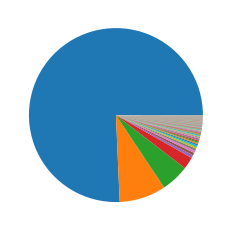

In [107]:
plt.pie(sharknado['Sex'].value_counts())
plt.show();

In [108]:
sharknado['Sex'] = sharknado['Sex'].astype('str')

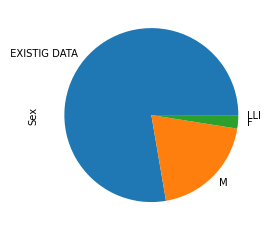

In [112]:
sharknado['Sex'].value_counts().plot(kind = 'pie')

In [114]:
sharknado = sharknado.to_csv('/Users/joel/datamex_082020/module-1/pandas-project/your-code/sharknado.csv', index=False)